In [ ]:
!pip install pandas numpy matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Yeni Bölüm

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

human_data = pd.read_table('dna_data/human_data.txt')
chimp_data = pd.read_table('dna_data/chimp_data.txt')
dog_data = pd.read_table('dna_data/dog_data.txt')


In [ ]:
human_data.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4.0
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4.0
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3.0
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3.0
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3.0


In [ ]:
chimp_data.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


In [ ]:
#K-mer counting funciton
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [ ]:
#add kmers list to dataframe
human_data['words'] = human_data.apply(lambda x: getKmers(x['sequence']), axis=1)
#remove sequence column from dataframe
human_data = human_data.drop('sequence', axis=1)

human_data.head()

,class,words
0,4.0,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4.0,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3.0,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3.0,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3.0,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [ ]:
#add kmers list to dataframe
chimp_data['words'] = chimp_data.apply(lambda x: getKmers(x['sequence']), axis=1)
#remove sequence column from dataframe
chimp_data = chimp_data.drop('sequence', axis=1)

#add kmers list to dataframe
dog_data['words'] = dog_data.apply(lambda x: getKmers(x['sequence']), axis=1)
#remove sequence column from dataframe
dog_data = dog_data.drop('sequence', axis=1)

In [ ]:
#convert words to list
human_texts = list(human_data['words'])

human_texts[0]

['atgccc',
 'tgcccc',
 'gcccca',
 'ccccaa',
 'cccaac',
 'ccaact',
 'caacta',
 'aactaa',
 'actaaa',
 'ctaaat',
 'taaata',
 'aaatac',
 'aatact',
 'atacta',
 'tactac',
 'actacc',
 'ctaccg',
 'taccgt',
 'accgta',
 'ccgtat',
 'cgtatg',
 'gtatgg',
 'tatggc',
 'atggcc',
 'tggccc',
 'ggccca',
 'gcccac',
 'cccacc',
 'ccacca',
 'caccat',
 'accata',
 'ccataa',
 'cataat',
 'ataatt',
 'taatta',
 'aattac',
 'attacc',
 'ttaccc',
 'tacccc',
 'accccc',
 'ccccca',
 'ccccat',
 'cccata',
 'ccatac',
 'catact',
 'atactc',
 'tactcc',
 'actcct',
 'ctcctt',
 'tcctta',
 'ccttac',
 'cttaca',
 'ttacac',
 'tacact',
 'acacta',
 'cactat',
 'actatt',
 'ctattc',
 'tattcc',
 'attcct',
 'ttcctc',
 'tcctca',
 'cctcat',
 'ctcatc',
 'tcatca',
 'catcac',
 'atcacc',
 'tcaccc',
 'caccca',
 'acccaa',
 'cccaac',
 'ccaact',
 'caacta',
 'aactaa',
 'actaaa',
 'ctaaaa',
 'taaaaa',
 'aaaaat',
 'aaaata',
 'aaatat',
 'aatatt',
 'atatta',
 'tattaa',
 'attaaa',
 'ttaaac',
 'taaaca',
 'aaacac',
 'aacaca',
 'acacaa',
 'cacaaa',
 'acaaac',

In [ ]:
#concatenate k-mer each with spaces
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])

print(human_texts[0])

atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatact atacta tactac actacc ctaccg taccgt accgta ccgtat cgtatg gtatgg tatggc atggcc tggccc ggccca gcccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctt tcctta ccttac cttaca ttacac tacact acacta cactat actatt ctattc tattcc attcct ttcctc tcctca cctcat ctcatc tcatca catcac atcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaac taaaca aaacac aacaca acacaa cacaaa acaaac caaact aaacta aactac actacc ctacca taccac accacc ccacct caccta acctac cctacc ctacct tacctc acctcc cctccc ctccct tccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaag caaagc aaagcc aagccc agccca gcccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaat aaaatt aaatta aattat attata ttataa tataac ataaca taacaa aacaaa acaaac

In [ ]:
y_data = human_data.iloc[:, 0].values
y_data

array([4, 4, 3, ..., 6, 6, 6])

In [ ]:
chimp_texts = list(chimp_data['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
y_chimp = chimp_data.iloc[:, 0].values

dog_texts = list(dog_data['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
y_dog = dog_data.iloc[:, 0].values

In [ ]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))


In [ ]:

X = cv.fit_transform(human_texts)

print(X.shape)

(4380, 232414)


In [ ]:

X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)


print(X_chimp.shape)
print(X_dog.shape)

(1682, 232414)
(820, 232414)


<Axes: >

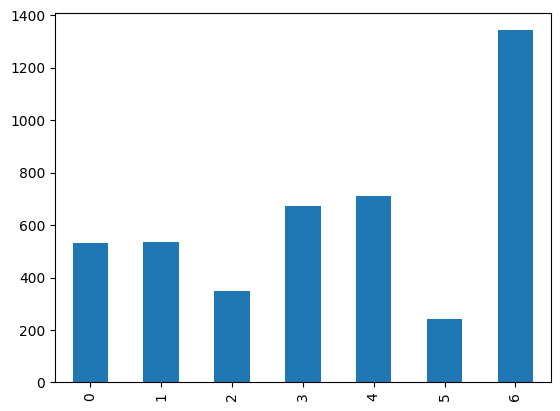

In [ ]:
#Plot human_data
human_data['class'].value_counts().sort_index().plot.bar()

In [ ]:
from sklearn.model_selection import train_test_split

#Split test data and train data randomly
#Train data size %80
#Test data size %20
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y_data,
                                                    test_size = 0.20,
                                                    random_state=42)
print(X_train.shape)
print(X_test.shape)

(3504, 232414)
(876, 232414)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984


In [ ]:
y_pred_chimp = classifier.predict(X_chimp)

In [ ]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_chimp, name='Actual'), pd.Series(y_pred_chimp, name='Predicted')))

accuracy, precision, recall, f1 = get_metrics(y_chimp, y_pred_chimp)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted    0    1    2    3    4    5    6
Actual                                      
0          232    0    0    0    0    0    2
1            0  184    0    0    0    0    1
2            0    0  144    0    0    0    0
3            0    0    0  227    0    0    1
4            2    0    0    0  254    0    5
5            0    0    0    0    0  109    0
6            0    0    0    0    0    0  521
accuracy = 0.993 
precision = 0.994 
recall = 0.993 
f1 = 0.993


In [ ]:
y_pred_dog = classifier.predict(X_dog)

In [ ]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_dog, name='Actual'), pd.Series(y_pred_dog, name='Predicted')))

accuracy, precision, recall, f1 = get_metrics(y_dog, y_pred_dog)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted    0   1   2   3    4   5    6
Actual                                  
0          127   0   0   0    0   0    4
1            0  63   0   0    1   0   11
2            0   0  49   0    1   0   14
3            1   0   0  81    2   0   11
4            4   0   0   1  126   0    4
5            4   0   0   0    1  53    2
6            0   0   0   0    0   0  260
accuracy = 0.926 
precision = 0.934 
recall = 0.926 
f1 = 0.925
